### Using Predictive Analysis To Predict Diagnosis of a Breast Tumor

#### Problem
- With being the most common type of cancer in women, breast cancer accounts for 14% of cancers in Indian women. It is reported   that with every four minutes, an Indian woman is diagnosed with breast cancer. Breast cancer is on the rise, both in rural and   urban India. A 2018 report of Breast Cancer statistics recorded 1,62,468 new registered cases and 87,090 reported deaths.

- A Tumor does not mean cancer - Tumors can be...
> benign [ not cancerous ], 
> pre-malignant [ pre-cancerous ], 
> malignant [ cancerous ]

- Test Such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed

- We are using dataset Breast cancer wisconsin (diagnostic) dataset
- Since this build a model that can classify a breast cancer tumor using two training classification:
> 1= Malignant (Cancerous) - Present, 
> 0= Benign (Not Cancerous) -Absent
- In Machine Learning this is a classification problem.
- Thus, The goal is to classify whether the breast cancer is benign or malignant

#### The Dataset
- The Breast Cancer datasets is available machine learning repository maintained by the University of California, Irvine. The dataset contains 569 samples of malignant and benign tumor cells.
- The columns contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

In [262]:
# Load All Required Libraries

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd

from sklearn.datasets import load_breast_cancer

from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

from IPython.display import Image, display

sns.set(style = 'darkgrid')

% matplotlib inline

In [263]:
# Load Dataset and Describing the Data

cancer = load_breast_cancer()

cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [264]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [265]:
# Converting the given data to Dataframe using Pandas Dataframe Function

df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [266]:
# Inspecting Data, here Head Function Give us First Five Row of Dataset

df_cancer.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [267]:
# Checking Number of cases, as well as number of fields using the shape method

df_cancer.shape

(569, 31)

In [268]:
# info() method provides concise summury of data from the output, it provides type of data in each column
# The number of non-value in each column and how much memory dataframe is using

df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [269]:
# The describe() method provides discriptive statistics including those that summarize the central tendency. dispersion
# and shape of dataset's distribution, excluding NaN values.

df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


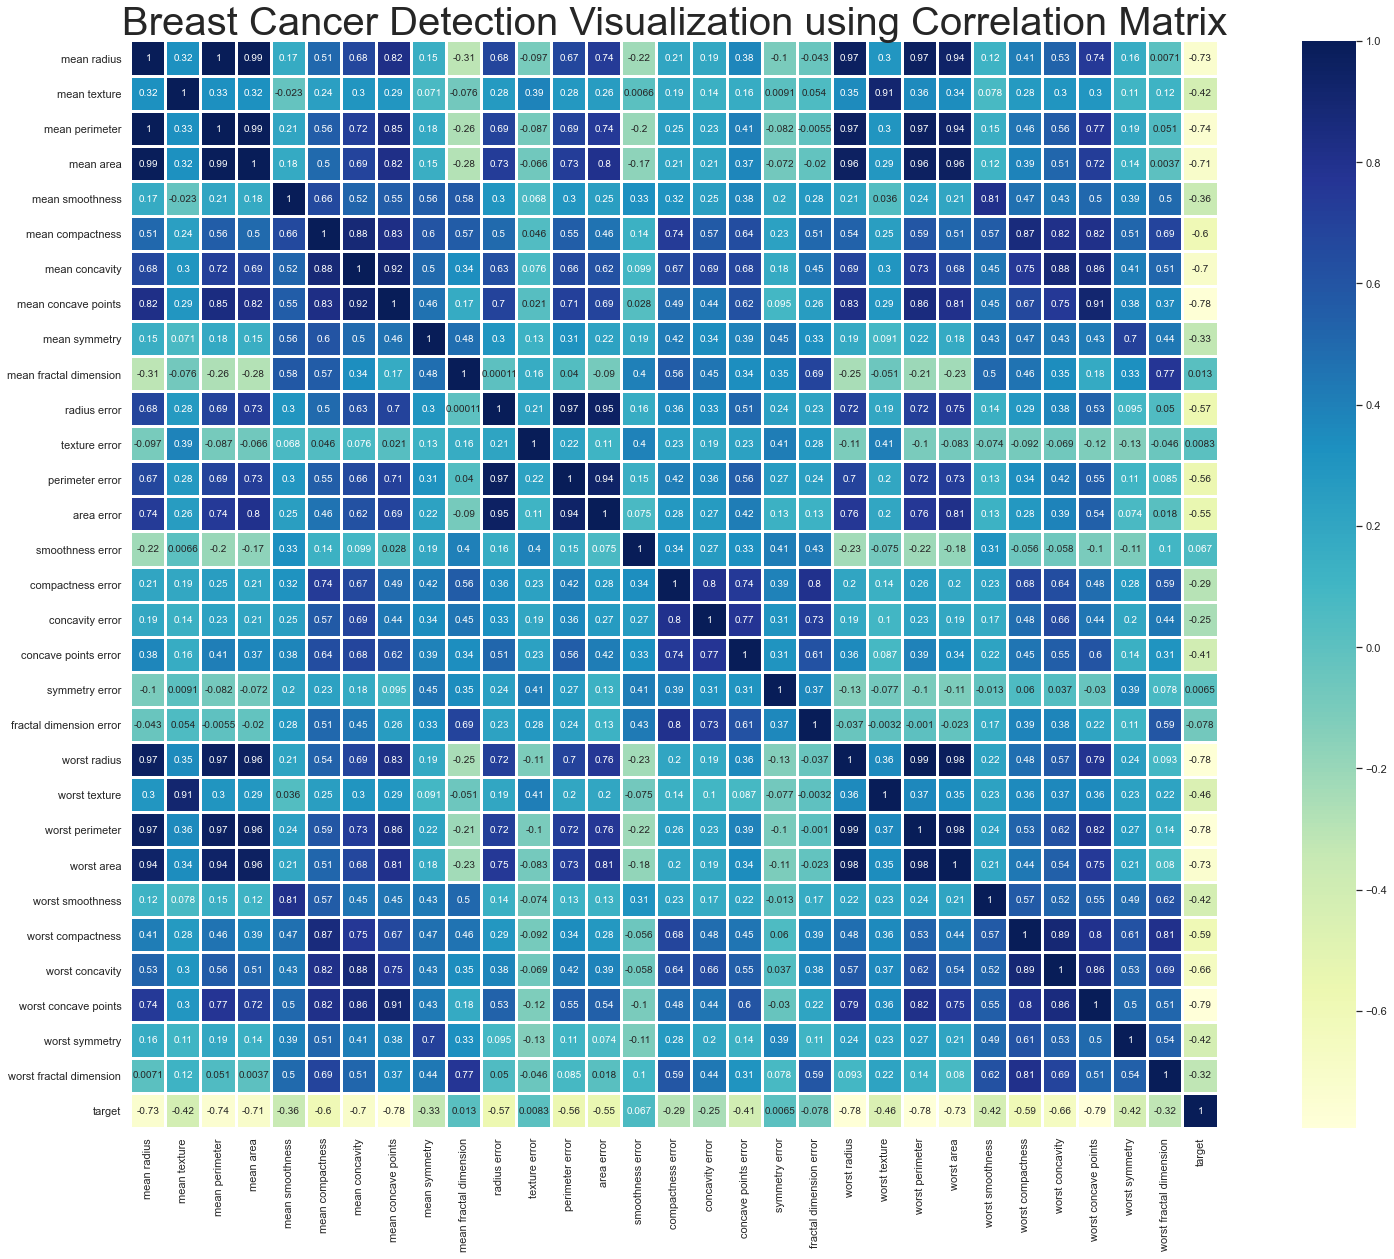

In [270]:
""" Data Visualization """

plt.figure(figsize=(30, 20))

plt.title('Breast Cancer Detection Visualization using Correlation Matrix', fontsize=40, ha='center')

sns.heatmap(df_cancer.corr(), annot=True, square='square', fmt='.2g', linewidths=2, cmap="YlGnBu")

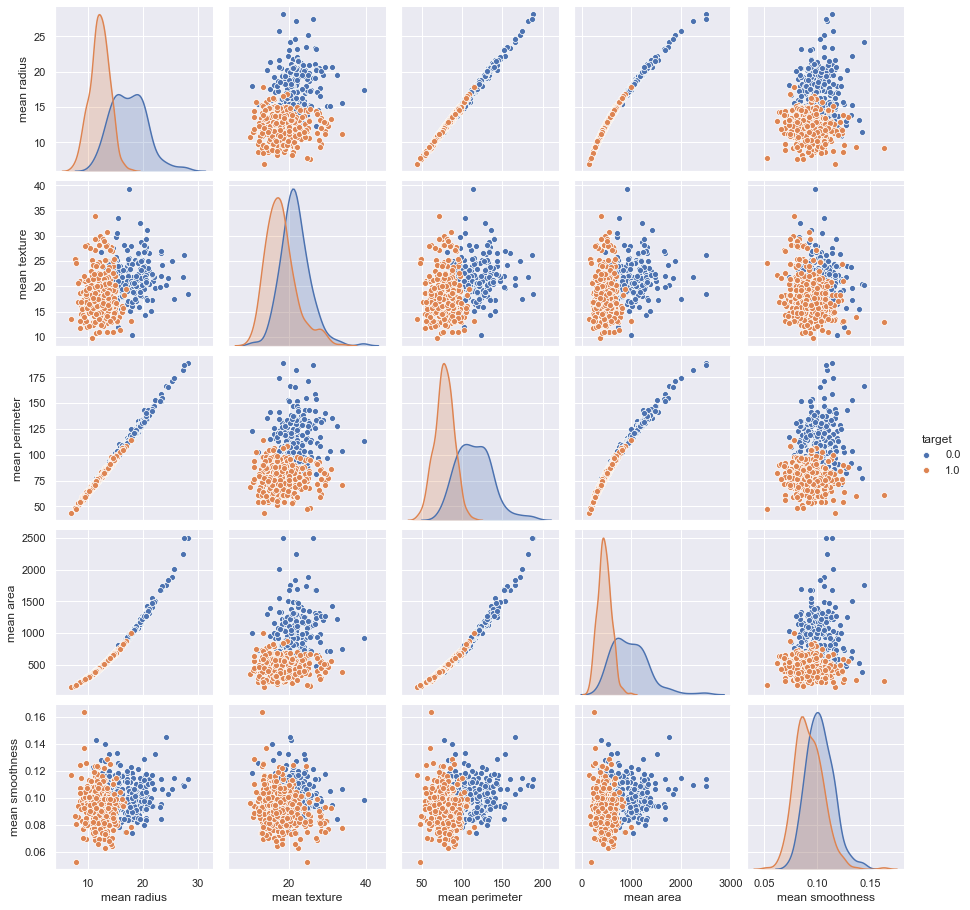

In [271]:
sns.pairplot(df_cancer, hue='target', vars=[cancer.feature_names[0], cancer.feature_names[1], cancer.feature_names[2], cancer.feature_names[3], cancer.feature_names[4]])

In [272]:
"""Pre Processing The Data"""

# Assesing Model Accuracy: Spliting Data into Training and Testing Sets

X = cancer.data

Y = cancer.target

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [273]:
# Feature Standardization

scaler = MinMaxScaler(feature_range=(0, 1))

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [274]:
""" Predictive Model using Support Vector Machine """

svc = SVC()

svc.fit(x_train, y_train)

classifier_score = svc.score(x_test, y_test)

print('\n The Classifier accuracy score is', classifier_score)


 The Classifier accuracy score is 0.972027972027972


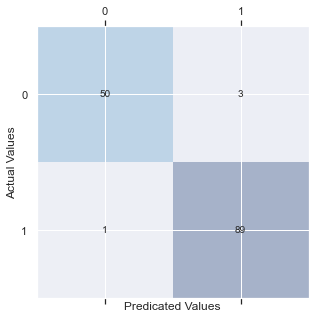

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        53
           1       0.97      0.99      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [275]:
y_pred = svc.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))

ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    
    for j in range(cm.shape[1]):
        
        ax.text(x = j, y = i, s = cm[i, j], va='center', ha='center')

plt.xlabel('Predicated Values', )

plt.ylabel('Actual Values')

plt.show()

print(classification_report(y_test, y_pred))

#### Observation
- There are two possible predicted classes: "1" and "0". Malignant = 1 and Benign = 0
- The classifier made a total of 143 predictions (i.e 143 patients were being tested for the presence breast cancer).
- Out of those 174 cases, the classifier predicted "yes" 97 times, and "no" 46 times.
- In reality, 90 patients in the sample have the disease, and 53 patients do not.

### Optimizing The SVM Classifier
- Machine learning models are parameterized so that their behavior can be tuned for a given problem. Models can have many parameters and finding the best combination of parameters can be treated as a search problem. In this notebook, I aim to tune parameters of the SVM Classification model using scikit-learn.

In [276]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.001], 'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose = 4)

grid.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.895, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.965, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.941, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.953, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.976, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.884, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.977, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.976, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.953, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.930, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.976, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.6s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [277]:
print('The Best parameters are %s with a score of %0.2f' % (grid.best_params_, grid.best_score_))

The Best parameters are {'C': 1, 'gamma': 1, 'kernel': 'rbf'} with a score of 0.98


In [278]:
grid_score = grid.score(x_test, y_test)

print('\nThe grid accuracy score is', grid_score)


The grid accuracy score is 0.972027972027972


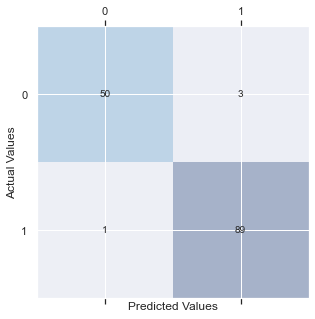

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        53
           1       0.97      0.99      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [279]:
grid_pred = grid.predict(x_test)

cm = confusion_matrix(y_test, grid_pred)

fig, ax = plt.subplots(figsize=(5, 5))

ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    
    for j in range(cm.shape[1]):
        
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

plt.xlabel('Predicted Values', )

plt.ylabel('Actual Values')

plt.show()

print(classification_report(y_test, grid_pred ))

#### Observation
- There are two possible predicted classes: "1" and "0". Malignant = 1 and Benign = 0 
- The classifier made a total of 143 predictions (i.e 143 patients were being tested for the presence breast cancer).
- Out of those 174 cases, the classifier predicted "yes" 92 times, and "no" 51 times.
- In reality, 90 patients in the sample have the disease, and 53 patients do not.

## Final Accuracy Reached - 97%